In [35]:
import pandas as pd
import numpy as np

In [76]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# 성별, 클래스 별로  생존자 집계
titanic.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
# pivot_table과 groupby를 각각 활용해서 데이터를 추출
titanic.pivot_table(index=['Sex', 'Pclass'], values='Survived', aggfunc='count')

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

In [78]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
# 890번 행을 new_row라는 변수에 담아본다
new_row = titanic.loc[890, :]
new_row, type(new_row)

(PassengerId                    891
 Survived                         0
 Pclass                           3
 Name           Dooley, Mr. Patrick
 Sex                           male
 Age                           32.0
 SibSp                            0
 Parch                            0
 Ticket                      370376
 Fare                          7.75
 Cabin                          NaN
 Embarked                         Q
 Name: 890, dtype: object,
 pandas.core.series.Series)

In [80]:
# 891번째 인덱스에 new_row 삽입
titanic.loc[891] = new_row 
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
891,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [81]:
titanic.shape # 위에서 데이터를 삽입했기떄문에 shape이 증가함

(892, 12)

In [82]:
# 열 추가
titanic['3Pclass'] = titanic['Pclass'] * 3
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,9


In [83]:
titanic.shape
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
 12  3Pclass      892 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.6+ KB


In [84]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,9
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,3
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9
891,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9


In [62]:
# append() 행을 추가할 수 있다.( 딕셔너리 활용 )
new_row = {'PassengerId': 893, 'Survived': 1, 'Pclass': 1}
titanic = titanic.append(new_row, ignore_index=True)
 # 나머지 인덱스 무시

AttributeError: 'DataFrame' object has no attribute 'append'

In [85]:
# 중간에 하나 넣어보자
insert_index = 891 
pre_df = titanic.iloc[:insert_index, :]
# pre_df.tail()
after_df = titanic.iloc[insert_index:, : ]
# after_df
new_df = pd.DataFrame([[892, 1, 1, 'kavin', 'male', 40.0, 1, 2, 'T123', 45.8, np.nan, 'S', 6]],
columns = titanic.columns)
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
0,892,1,1,kavin,male,40.0,1,2,T123,45.8,NaN,S,6


In [88]:
new_df_ = pd.concat([pre_df, new_df,after_df], ignore_index=True)
new_df_.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,9
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,3
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9
891,892,1,1,kavin,male,40.0,1,2,T123,45.80,NaN,S,6
892,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9


In [93]:
titanic.insert(3, 'Custom_1', titanic['3Pclass']/3)

,PassengerId,Survived,Pclass,Custom_1,Custom_P,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
0,1,0,3,3.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,9
1,2,1,1,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,3.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9
3,4,1,1,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,3.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,9
5,6,0,3,3.0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,9
6,7,0,1,1.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3
7,8,0,3,3.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,9
8,9,1,3,3.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,9
9,10,1,2,2.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,6


In [97]:
print(titanic.head(2))
titanic.tail(2)

   PassengerId  Survived  Pclass  Custom_1  Custom_P  \
0            1         0       3       3.0       3.0   
1            2         1       1       1.0       1.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  3Pclass  
0      0  A/5 21171   7.2500   NaN        S        9  
1      0   PC 17599  71.2833   C85        C        3  


,PassengerId,Survived,Pclass,Custom_1,Custom_P,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
890,891,0,3,3.0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9
891,891,0,3,3.0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9


In [101]:
# 행/열 삭제
titanic = titanic.drop(range(800, 890), axis=0) # 열 삭제


In [103]:
titanic.tail()

,PassengerId,Survived,Pclass,Custom_1,Custom_P,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
797,798,1,3,3.0,3.0,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S,9
798,799,0,3,3.0,3.0,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C,9
799,800,0,3,3.0,3.0,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,9
890,891,0,3,3.0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,9
891,891,0,3,3.0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,9


In [107]:
a = titanic.drop(['3Pclass', 'Custom_P', 'Custom_1'], axis=1) # 행 삭제
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
! pip install openpyxl# 엑셀 파일 읽기 오류시 사용


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
import pandas as pd
sample_1 = pd.read_excel('data/sample_1.xlsx', header = 1, usecols = 'A:C', skipfooter=2 ) # skipfooter=2 밑의 두개 삭제
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [133]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [134]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [162]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [170]:
# 국적코드와 입국객 수만 데이터를 보자
sample_1[['국적코드', '입국객수']]
# 기준연월 컬럼을 추가하고 값을 2019-11 넣어 보자
sample_1['기준연월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준연월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [173]:
# 성별이 남성인 정보를 추출해 보자
condition = (sample_1['성별'] == '남성')  & (sample_1['입국객수'] >= 150000) 
condition, type(condition)
sample_1[condition]

,국적코드,성별,입국객수,기준연월
4,A18,남성,158912,2019-11


In [188]:
condition = sample_1['국적코드'].isin(['A01', 'A18']) # 컬럼이 하나일 때 isin이 효율적!
sample_1[~condition] # == condition == False 도 가능

,국적코드,성별,입국객수,기준연월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [190]:
# merge
sample_1

,국적코드,성별,입국객수,기준연월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [192]:
code_master = pd.read_excel('data/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [237]:
sample_1_merge_left = pd.merge(left=sample_1,right=code_master, how='left',left_on='국적코드',right_on='국적코드')
sample_1_merge_left

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [215]:
sample_2 = pd.read_excel('data/sample_2.xlsx', header = 1, usecols='A:C', skipfooter=2)
sample_2

,국적코드,성별,입국객수
0,A01,남성,92556
1,A01,여성,163737
2,A18,남성,155540
3,A18,여성,249023


In [218]:
sample_2['기준연월'] = '2019-12'
sample_2

,국적코드,성별,입국객수,기준연월
0,A01,남성,92556,2019-12
1,A01,여성,163737,2019-12
2,A18,남성,155540,2019-12
3,A18,여성,249023,2019-12


In [232]:
sample_2_merge_left = pd.merge(left=sample_2,right=code_master,how='inner', left_on='국적코드', right_on='국적코드')
sample_2_merge_left

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [239]:
sample = pd.concat([sample_1_merge_left, sample_2_merge_left], ignore_index = True, axis =0)
sample

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [238]:
sample.to_excel('data/sample.xlsx')

In [230]:
sample.to_excel('data/sample_index_false.xlsx', index=False)

In [241]:
sample

,국적코드,성별,입국객수,기준연월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [245]:
#기준연월 기준으로 국적별 입국객수의 평균과 max를 출력
sample.groupby(['기준연월', '국적명'])['입국객수'].agg(['mean', 'max'])

mean     max
기준연월    국적명                  
2019-11 일본   148878.0  191436
        중국   195927.5  232943
2019-12 일본   128146.5  163737
        중국   202281.5  249023

In [249]:
sample.pivot_table(index=['기준연월','국적명','성별'], values='입국객수', aggfunc=['mean', 'max']) 

mean     max
                    입국객수    입국객수
기준연월    국적명 성별                  
2019-11 일본  남성  106320.0  106320
            여성  191436.0  191436
        중국  남성  158912.0  158912
            여성  232943.0  232943
2019-12 일본  남성   92556.0   92556
            여성  163737.0  163737
        중국  남성  155540.0  155540
            여성  249023.0  249023

In [256]:
# 국적별 입국객수
sample.groupby('국적명')['입국객수'].sum() #groupby

국적명
일본    554049
중국    796418
Name: 입국객수, dtype: int64

In [258]:
sample.pivot_table(index=['국적명'], values='입국객수', aggfunc=['sum']) # pivot_table

,sum
,입국객수
국적명,
일본,554049
중국,796418


### 데이터 시각화 라이브러리
Matplotlib 
- 데이터를 차트나 플롯으로 시각화하는 라이브러리

In [260]:
import matplotlib.pyplot as plt

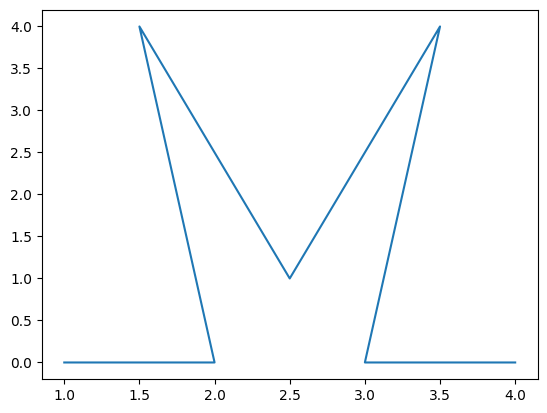

In [289]:
# 한개의 리스트를 입력시 y값으로 인식
# x축은 0, ~
plt.plot([1,2,1.5,2.5,3.5,3,4], [0, 0, 4,1,4,0,0])
plt.show()

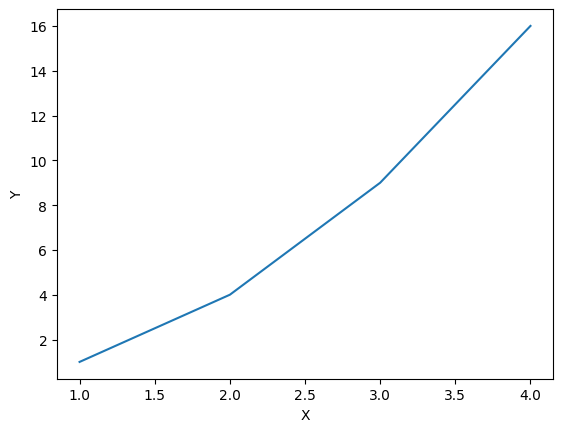

In [290]:
plt.plot([1,2,3,4],[1,4,9,16])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [293]:
import numpy as np
x = [1,2,3,4]
y = np.square(x) #제곱
y, type(y)

(array([ 1,  4,  9, 16]), numpy.ndarray)

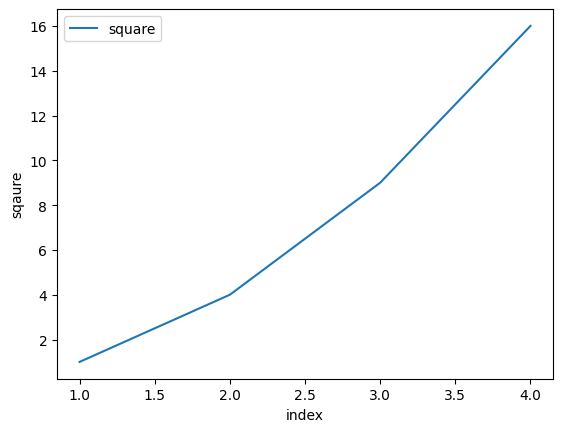

In [306]:
plt.plot(x,y, label = 'square') # 범례 이름
plt.xlabel('index')
plt.ylabel('sqaure')
plt.legend() # 벙례 추가
plt.show()

### 축범위 설정
- xlim() : x축 범위 지정 (min, max)
- ylim() : y축 범위 지정 (min, max)
- axis() : x,y축 범위 지정

(0.0, 15.0)

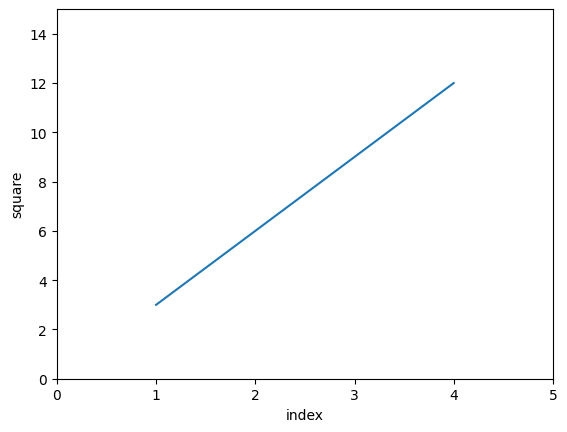

In [307]:
plt.plot([1,2,3,4], [3,6,9,12])
plt.xlabel('index')
plt.ylabel('square')
plt.xlim([0, 5])  # [min, max]
plt.ylim([0, 15])
# plt.axis([0,5,0,15]) ->  위의 두개를 한번에 적용하는 방법

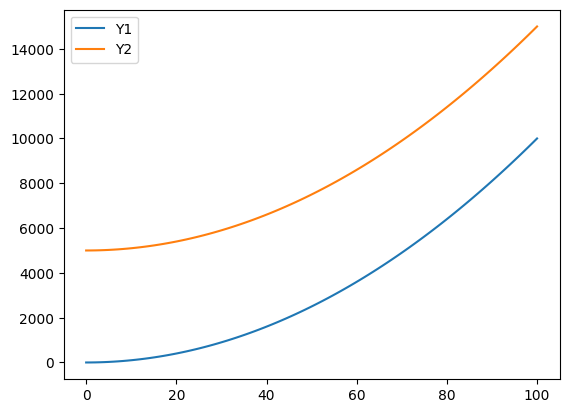

In [309]:
X = np.linspace(0, 100, 100)
Y1 = X**2
Y2 = X**2+5000
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.legend(('Y1','Y2'))
plt.show()

In [310]:
import matplotlib.colors as mcolors
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

Text(0.5, 1.0, 'Graph Title')

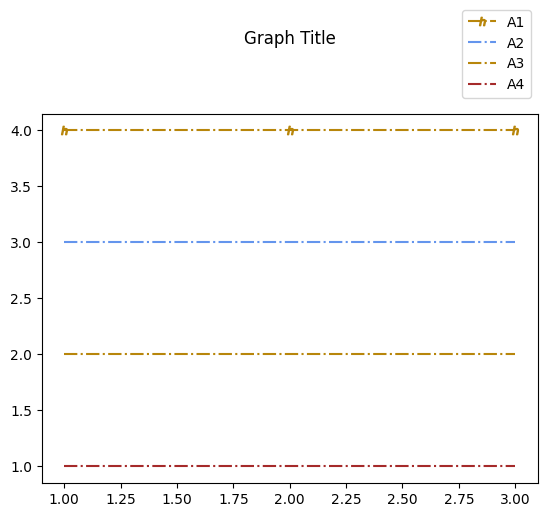

In [356]:
plt.plot([1,2,3],[4,4,4], marker='$h$', linestyle = 'dashdot', color = '#B8860B', label='A1') # dotted 점선
plt.plot([1,2,3],[3,3,3], linestyle = 'dashdot', color = '#6495ED', label='A2') # dotted 점선
plt.plot([1,2,3],[2,2,2], linestyle = 'dashdot', color = '#B8860B', label='A3') # dotted 점선
plt.plot([1,2,3],[1,1,1], linestyle = 'dashdot', color = '#A52A2A', label='A4') # dotted 점선
plt.legend(loc='upper right', bbox_to_anchor=(1.0,1.3))

plt.title('Graph Title', loc='center', pad=50.0)

In [364]:
plt.rcParams
findKeys = [key for key in plt.rcParams.keys() if 'font' in key]
findKeys

['font.cursive',
 'font.family',
 'font.fantasy',
 'font.monospace',
 'font.sans-serif',
 'font.serif',
 'font.size',
 'font.stretch',
 'font.style',
 'font.variant',
 'font.weight',
 'legend.fontsize',
 'legend.title_fontsize',
 'mathtext.fontset',
 'pdf.fonttype',
 'pdf.use14corefonts',
 'pgf.rcfonts',
 'ps.fonttype',
 'svg.fonttype']

In [365]:
plt.rcParams['font.family'] = 'Malgun Gothic'

### 그래프 종류

#### 선그래프

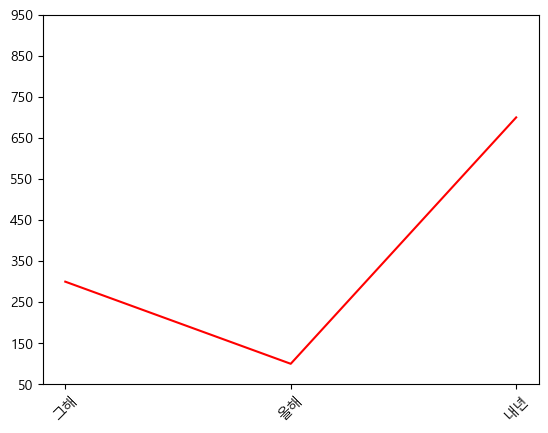

In [372]:
# xtick : x축에 대한 눈금 설정
# ytick : y축에 대한 눈금 설정

years = ['2022','2023','2024']
values = [300, 100, 700]

plt.plot(years, values, color = 'r')
plt.xticks(rotation = 45)
plt.xticks(['2022', '2023', '2024'], ['그해', '올해', '내년'])
plt.yticks(range(50,1000,100))
plt.show()

#### 막대그래프

<BarContainer object of 3 artists>

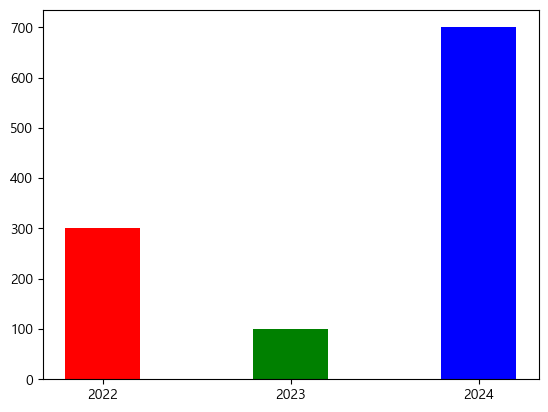

In [374]:
plt.bar(years, values, color=['r', 'g', 'b'], width=0.4)

#### 분포표

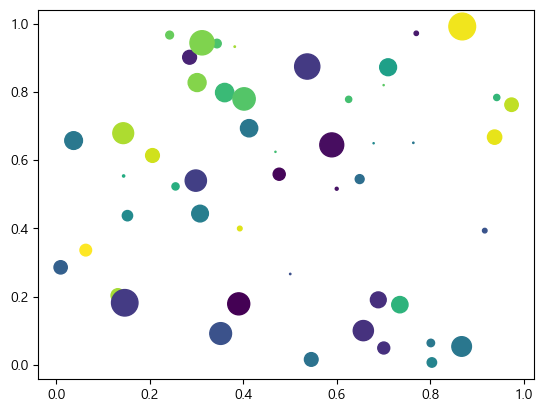

In [496]:
x = np.random.rand(50)
y = np.random.rand(50)
size = (np.random.rand(50)*20)**2
colors = np.random.rand(50)

plt.scatter(x,y, c=colors, s=size)

#### 가로 막대그래프

<BarContainer object of 3 artists>

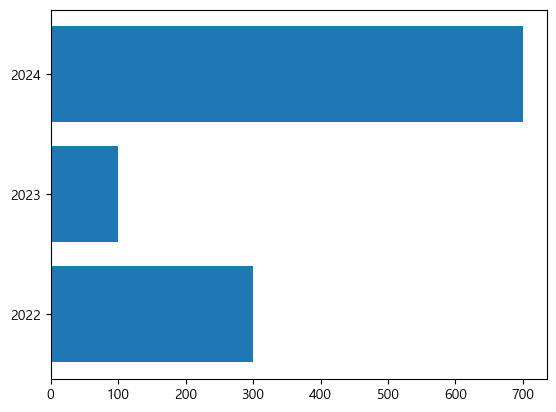

In [498]:
years = ['2022','2023','2024']
values = [300, 100, 700]

plt.barh(years, values)


In [526]:
data = {'C': 20, 'C++': 15, 'Java':30, 'Python': 35}
data.items()

dict_items([('C', 20), ('C++', 15), ('Java', 30), ('Python', 35)])

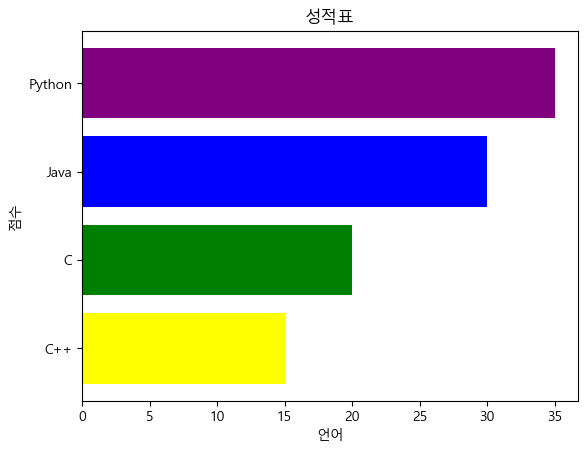

In [538]:

sort_ = sorted(data.items(), key= lambda x:x[1])
type(sort_)

dict_ =  dict(sort_)
coures = list(dict_.keys())
values = list(dict_.values())

plt.barh(coures, values, color = ['yellow','g','b','purple'])
plt.xlabel('언어')
plt.ylabel('점수')
plt.title('성적표')
plt.show()


#### 원형 그래프

([<matplotlib.patches.Wedge at 0x26a0fb5b620>,
 [Text(0.5299290306818474, 0.9639373540021144, 'Apple'),
  Text(-0.847564586091269, 0.7011663657106894, 'Banana'),
  Text(-0.20611940355491007, -1.0805159839068408, 'Melon')],
 [Text(0.28905219855373493, 0.5257840112738805, '34.0%'),
  Text(-0.46230795604978303, 0.3824543812967396, '10.0%'),
  Text(-0.11242876557540547, -0.5893723548582768, '56.0%')])

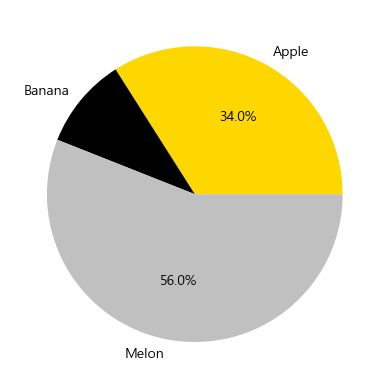

In [549]:
labels = ['Apple', 'Banana', 'Melon']
colors = ['gold', 'black', 'silver']
ratio = [34,10,56]
plt.pie(ratio, labels = labels, colors = colors, autopct='%.1f%%') # 소수점을 설정하는 함수